In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

06/16/2019 20:10:31 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
06/16/2019 20:10:47 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
06/16/2019 20:11:03 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
06/16/2019 20:11:19 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-11_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, sm

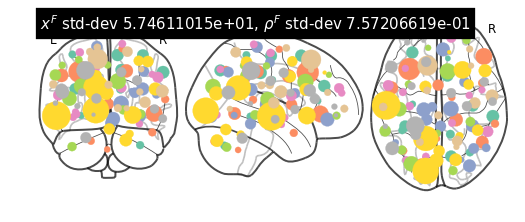

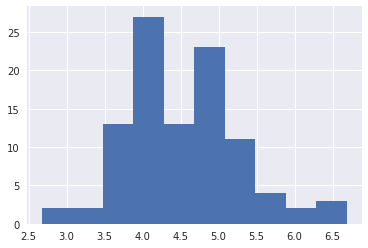

(<nilearn.plotting.displays.OrthoProjector at 0x7f9fac754198>,
 tensor([[-3.7770e+01, -4.3879e+01,  5.7979e+01],
         [ 5.7583e+01, -2.9081e+01,  3.9265e+01],
         [-2.8523e+01, -4.0039e+01, -6.2867e+00],
         [-2.7156e+01,  3.8015e+01,  2.5413e+01],
         [ 1.3669e+01, -7.1267e+01,  4.1770e+01],
         [ 1.0307e+01,  3.1771e+01,  9.3881e+00],
         [ 3.3461e+01, -6.7017e+01, -3.7429e+01],
         [ 3.6418e+01, -1.7904e+01,  5.7177e+01],
         [-1.7536e+01, -5.8931e+01, -7.8653e-01],
         [ 1.2869e+01, -4.7973e+01,  2.1450e+01],
         [-3.4794e+01, -3.9452e+01,  2.1768e+01],
         [-2.6827e+01, -1.6280e+01,  3.1942e+01],
         [ 9.7588e+00,  1.3806e+01,  5.7350e+01],
         [ 1.8354e-02,  3.6564e+00,  5.8417e+00],
         [ 4.8120e+01,  3.3870e+01, -4.0511e+00],
         [-3.6558e+01, -6.5339e+01,  4.2464e+01],
         [ 4.6260e+01,  5.9534e+00, -2.3978e+01],
         [ 1.4384e+01, -9.2910e+00,  6.4010e+01],
         [-3.0259e+01,  2.0675e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [9]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100)

06/16/2019 20:27:42 [Epoch 1] (22981ms) Posterior free-energy 2.21370573e+09 = KL from prior 1.55864100e+06 - log-likelihood -2.21214746e+09
06/16/2019 20:27:42 Saving checkpoint...
06/16/2019 20:28:05 [Epoch 2] (22888ms) Posterior free-energy 2.12068954e+09 = KL from prior 1.41352000e+06 - log-likelihood -2.11927616e+09
06/16/2019 20:28:27 [Epoch 3] (22087ms) Posterior free-energy 2.05303130e+09 = KL from prior 1.28635588e+06 - log-likelihood -2.05174464e+09
06/16/2019 20:28:49 [Epoch 4] (22210ms) Posterior free-energy 2.00771290e+09 = KL from prior 1.17886388e+06 - log-likelihood -2.00653414e+09
06/16/2019 20:29:11 [Epoch 5] (22137ms) Posterior free-energy 1.97645850e+09 = KL from prior 1.08821975e+06 - log-likelihood -1.97537075e+09
06/16/2019 20:29:33 [Epoch 6] (22163ms) Posterior free-energy 1.95365414e+09 = KL from prior 1.00365475e+06 - log-likelihood -1.95265075e+09
06/16/2019 20:29:56 [Epoch 7] (22199ms) Posterior free-energy 1.93658573e+09 = KL from prior 9.25590875e+05 - log

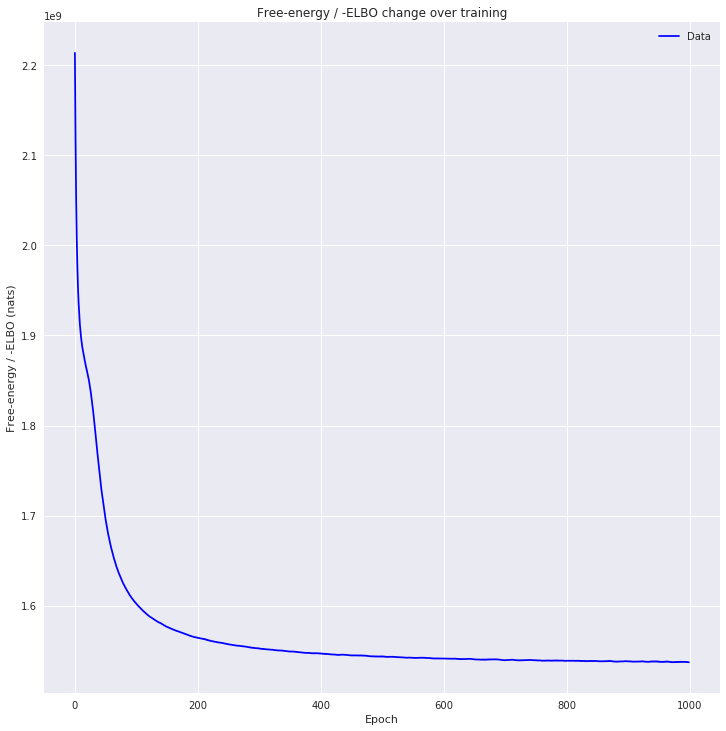

In [10]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

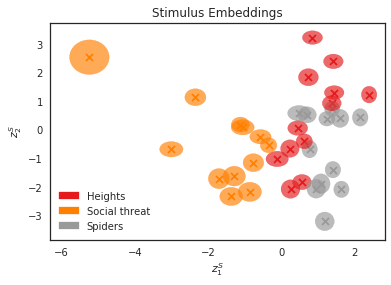

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

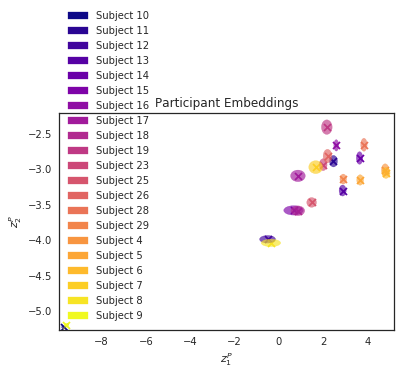

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [17]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

06/17/2019 10:16:43 Plotting factors for Participant 17, run 3


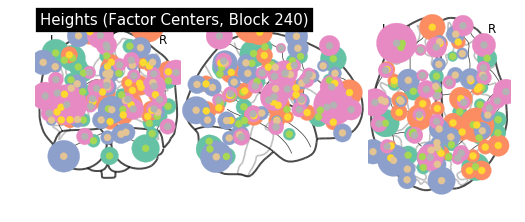

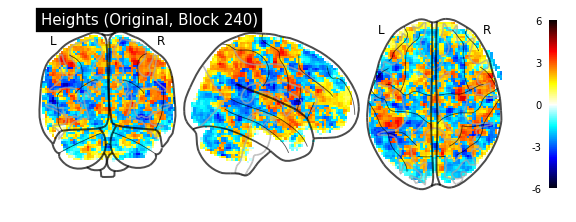

06/17/2019 10:16:47 Reconstruction Error (Frobenius Norm): 1.19820178e+03 out of 1.42856726e+03


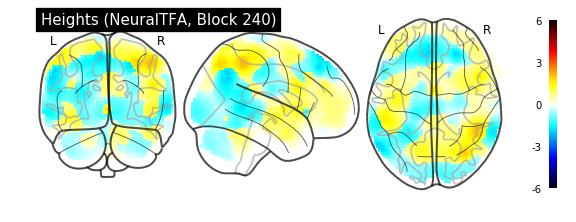

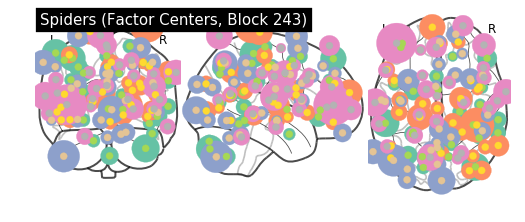

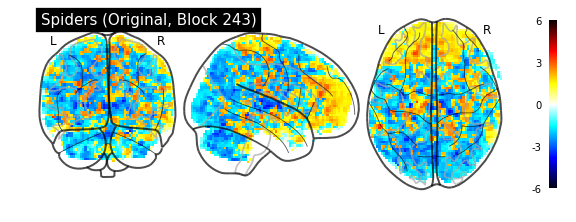

06/17/2019 10:16:52 Reconstruction Error (Frobenius Norm): 1.14430042e+03 out of 1.33274060e+03


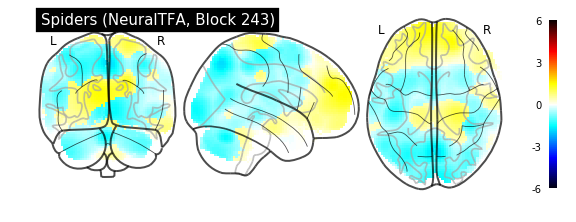

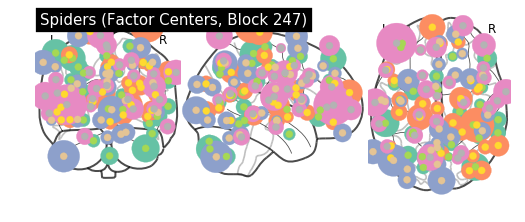

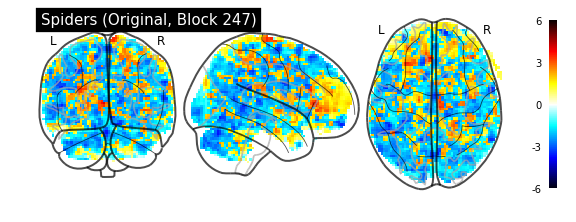

06/17/2019 10:16:57 Reconstruction Error (Frobenius Norm): 1.12990637e+03 out of 1.30625232e+03


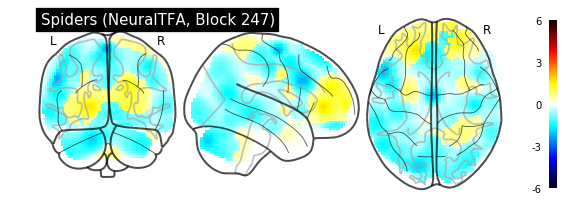

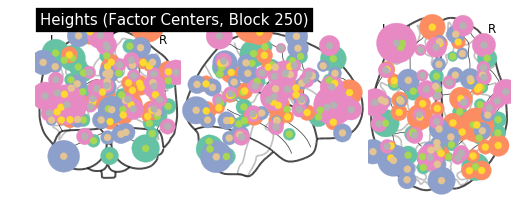

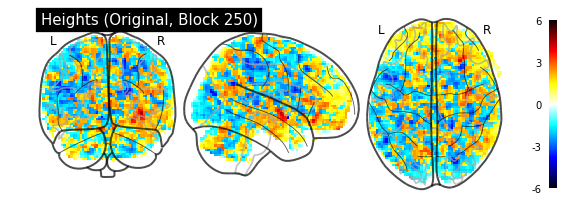

06/17/2019 10:17:01 Reconstruction Error (Frobenius Norm): 1.05663477e+03 out of 1.19032593e+03


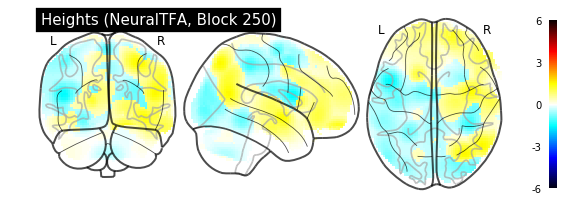

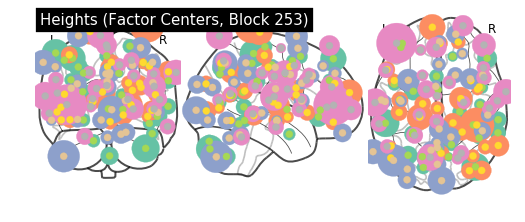

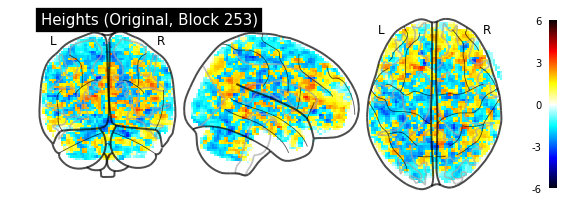

06/17/2019 10:17:06 Reconstruction Error (Frobenius Norm): 1.09215015e+03 out of 1.22500989e+03


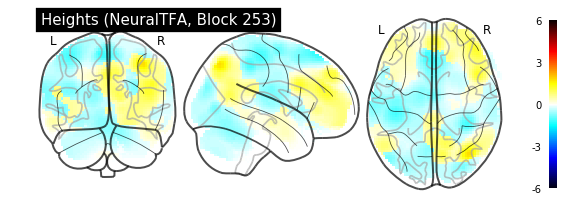

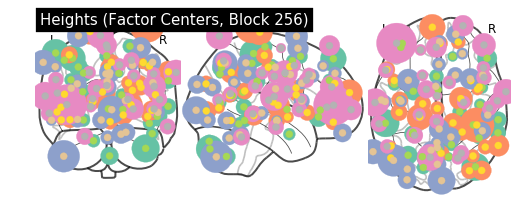

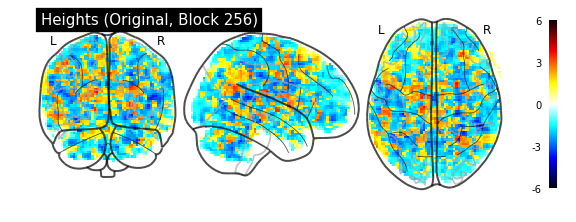

06/17/2019 10:17:11 Reconstruction Error (Frobenius Norm): 1.12214050e+03 out of 1.26381299e+03


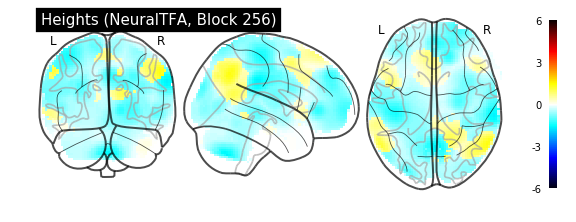

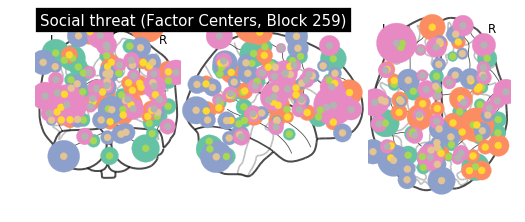

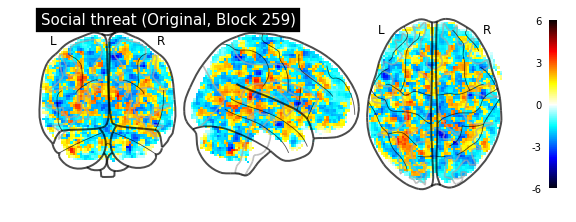

06/17/2019 10:17:16 Reconstruction Error (Frobenius Norm): 1.09167773e+03 out of 1.26534424e+03


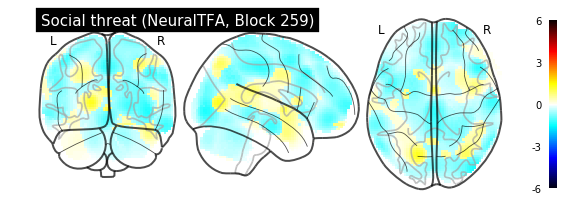

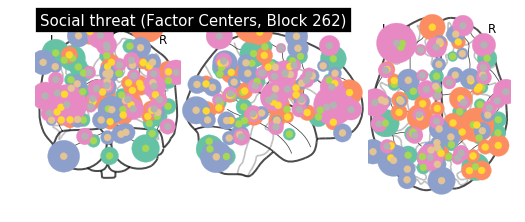

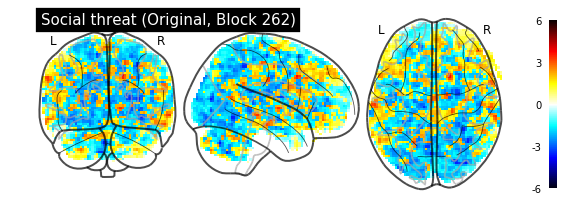

06/17/2019 10:17:21 Reconstruction Error (Frobenius Norm): 1.07385144e+03 out of 1.19295752e+03


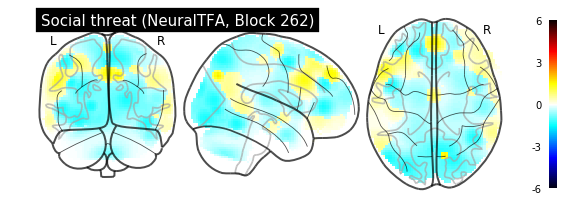

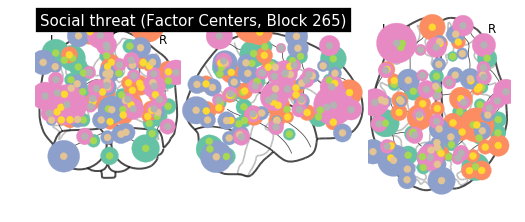

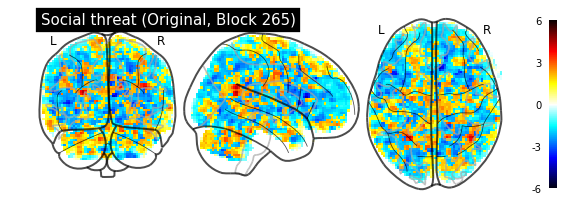

06/17/2019 10:17:25 Reconstruction Error (Frobenius Norm): 1.08678931e+03 out of 1.21802502e+03


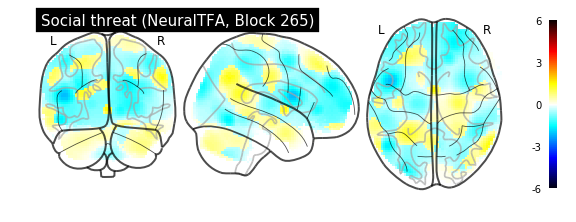

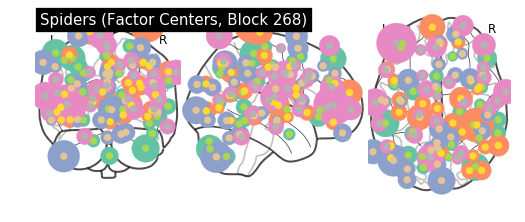

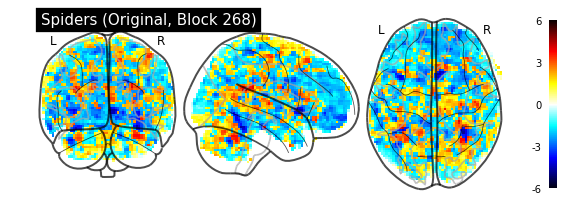

06/17/2019 10:17:30 Reconstruction Error (Frobenius Norm): 1.13685559e+03 out of 1.32442957e+03


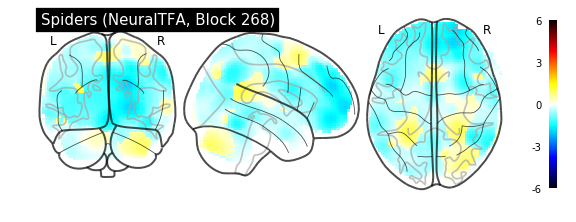

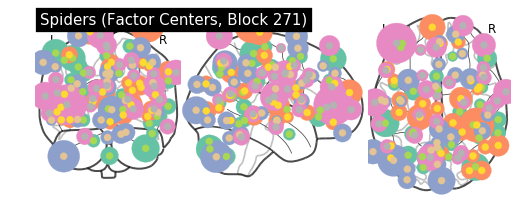

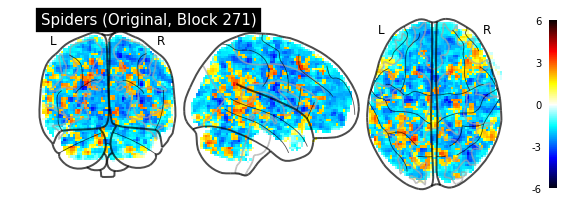

06/17/2019 10:17:35 Reconstruction Error (Frobenius Norm): 1.12270288e+03 out of 1.29801648e+03


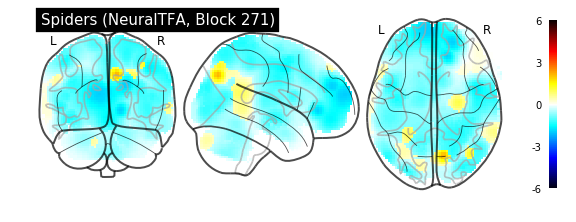

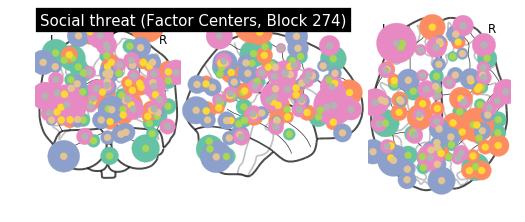

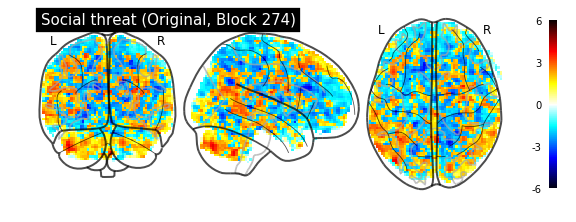

06/17/2019 10:17:40 Reconstruction Error (Frobenius Norm): 1.17316980e+03 out of 1.35258435e+03


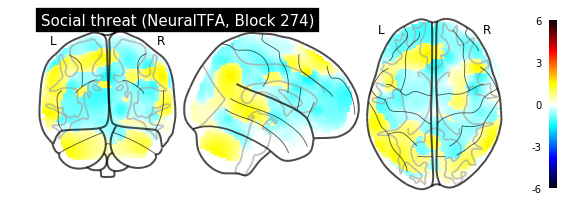

In [18]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)


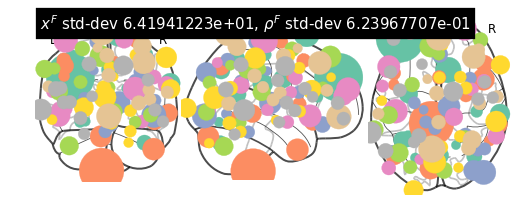

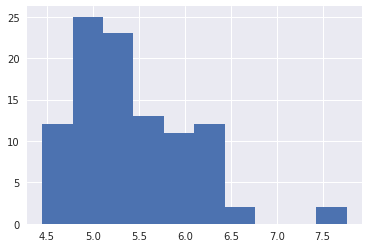

(<nilearn.plotting.displays.OrthoProjector at 0x7f9d2413d2e8>,
 tensor([[-3.7809e+01, -5.4314e+01,  5.3599e+01],
         [ 6.5105e+01, -2.6688e+01,  2.7728e+01],
         [-2.9605e+01, -5.0564e+01, -1.3004e+01],
         [-3.9867e+01,  5.3163e+01,  3.4434e+01],
         [ 1.9457e+00, -7.0286e+01,  4.1806e+01],
         [ 1.5489e+00,  3.1079e+01,  1.3742e+01],
         [ 3.8069e+01, -7.1441e+01, -3.4898e+01],
         [ 4.0534e+01, -2.3994e+01,  5.8418e+01],
         [-2.4053e+01, -7.2772e+01, -1.2479e+01],
         [ 1.8785e+01, -5.9353e+01,  2.2279e+01],
         [-3.1526e+01, -5.2754e+01,  1.6603e+01],
         [-3.1261e+01, -5.5214e+00,  3.2973e+01],
         [ 1.0751e+01,  1.9549e+01,  8.0121e+01],
         [ 1.0829e+00,  1.1880e+01,  6.2530e+00],
         [ 4.8659e+01,  2.6095e+01, -1.2326e+01],
         [-4.5800e+01, -7.0814e+01,  4.6089e+01],
         [ 4.7674e+01,  9.8081e+00, -4.1638e+01],
         [ 2.9226e+01, -7.1605e+00,  7.1795e+01],
         [-4.6784e+01,  1.6406e+01,  

In [19]:
dtfa.visualize_factor_embedding()

In [20]:
dtfa.average_reconstruction_error()

06/17/2019 10:18:23 Average reconstruction error (MSE): 8.33920912e-01
06/17/2019 10:18:23 Average data norm (Euclidean): 1.00953693e+00
06/17/2019 10:18:23 Percent average reconstruction error: 0.295606


(0.8339209121440679, 1.0095369290342087, 0.0029560616302382182)

In [21]:
dtfa.average_reconstruction_error(weighted=False)

06/17/2019 10:19:01 Average reconstruction error (MSE): 1.06950024e+03 +/- 9.29877304e+01
06/17/2019 10:19:01 Average data norm (Euclidean): 1.28980564e+03 +/- 1.57811242e+02
06/17/2019 10:19:01 Percent average reconstruction error: 83.367861 +/- 5.73639153e+00


(array([1226.93261719, 1117.77075195, 1205.13806152, 1198.73620605,
        1133.23986816, 1156.79577637, 1088.34057617, 1124.1706543 ,
        1166.91174316, 1105.98852539, 1180.22338867, 1158.05688477,
        1112.44055176, 1132.78222656, 1134.54541016, 1083.30236816,
        1104.71374512, 1105.97436523, 1124.92370605, 1126.14526367,
        1099.55578613, 1145.88391113, 1143.82958984, 1132.21435547,
        1124.32556152, 1171.0826416 , 1126.3515625 , 1161.21716309,
        1198.39440918, 1155.16760254, 1152.79248047, 1159.6751709 ,
        1126.45666504, 1206.5213623 , 1150.89367676, 1208.4552002 ,
        1031.4934082 , 1112.6081543 , 1051.29821777, 1069.73547363,
        1103.73913574, 1322.56884766, 1017.09228516, 1118.90625   ,
        1090.7199707 , 1145.73010254, 1231.90368652, 1013.02294922,
        1006.49719238,  971.68395996, 1023.175354  , 1068.30334473,
        1002.07312012, 1174.64086914, 1031.19970703,  981.07989502,
        1006.21936035, 1048.73742676,  990.39953

In [32]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [33]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [34]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [35]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [36]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [37]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [38]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [39]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [40]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [41]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

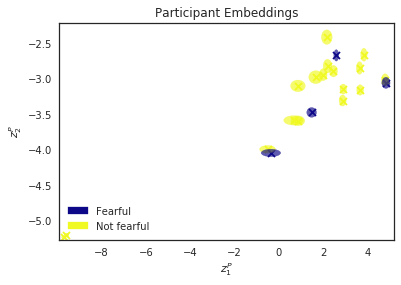

In [42]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

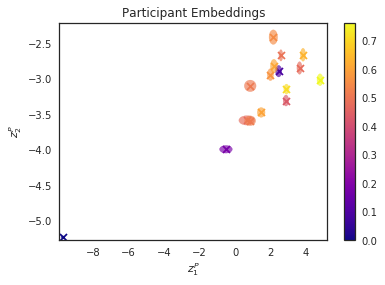

In [43]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

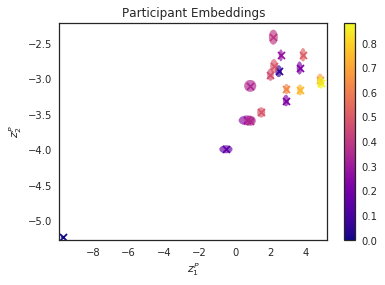

In [44]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

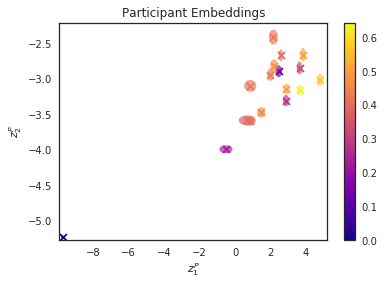

In [45]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

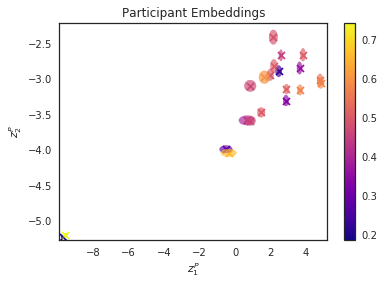

In [46]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')